# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

/kaggle/input/concrete-compressive-strength-dataset/Concrete Compressive Strength.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Concrete Compressive Strength.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440188,353.3,12.174719,28754.55,5.291503
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937235,335.4,11.113019,26736.87,3.741657
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749597,345.7,7.272371,46850.00,5.291503
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857140,380.0,6.022534,60648.00,5.291503
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248700,338.2,11.266723,29922.84,5.291503


## last Five row

In [4]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,1.333323,301.0,13.081385,24300.00,5.291503
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,0.266892,531.3,3.285896,75338.34,1.732051
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.649781,482.7,5.927620,49641.44,5.291503
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,0.666665,380.0,4.684197,77976.00,16.431677
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61,0.320370,540.0,3.218513,93420.00,2.645751


## Shape of our dataset

In [5]:
df.shape

(1030, 14)

## List out all columns

In [6]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'water_cement_ratio', 'total_binder',
       'aggregate_to_cement', 'cement_water_interaction',
       'age_strength_proxy'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

cement                      float64
slag                        float64
ash                         float64
water                       float64
superplastic                float64
coarseagg                   float64
fineagg                     float64
age                           int64
strength                    float64
water_cement_ratio          float64
total_binder                float64
aggregate_to_cement         float64
cement_water_interaction    float64
age_strength_proxy          float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cement                    1030 non-null   float64
 1   slag                      1030 non-null   float64
 2   ash                       1030 non-null   float64
 3   water                     1030 non-null   float64
 4   superplastic              1030 non-null   float64
 5   coarseagg                 1030 non-null   float64
 6   fineagg                   1030 non-null   float64
 7   age                       1030 non-null   int64  
 8   strength                  1030 non-null   float64
 9   water_cement_ratio        1030 non-null   float64
 10  total_binder              1030 non-null   float64
 11  aggregate_to_cement       1030 non-null   float64
 12  cement_water_interaction  1030 non-null   float64
 13  age_strength_proxy        1030 non-null   float64
dtypes: float

## Check Null Value

In [9]:
df.isnull().sum()

cement                      0
slag                        0
ash                         0
water                       0
superplastic                0
coarseagg                   0
fineagg                     0
age                         0
strength                    0
water_cement_ratio          0
total_binder                0
aggregate_to_cement         0
cement_water_interaction    0
age_strength_proxy          0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

25

## Remove Duplicate Value

In [11]:
df.drop_duplicates(inplace=True)

## Summary

In [12]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378,0.756217,406.211144,7.264571,50605.934915,5.783060
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815,0.313521,91.421010,2.885792,19745.856777,3.524953
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.266892,200.000000,3.097753,19584.000000,1.000000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000,0.547463,336.300000,4.965908,33216.000000,2.645751
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000,0.689528,388.400000,6.639973,48149.580000,5.291503
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000,0.937235,480.000000,9.566016,63126.000000,7.483315
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,1.882334,640.000000,17.931197,108300.000000,19.104973


## Unique Value of age

In [13]:
df['age'].unique()

array([ 28,  14,  90,   7,  56,   3, 100,  91, 180, 365, 270, 360, 120,
         1])

## Handle Outlier in Age

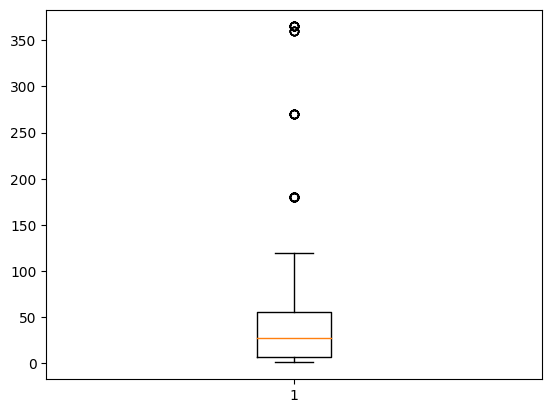

In [14]:
plt.boxplot(x = 'age', data=df)
plt.show()

In [15]:
# Q1 & Q3
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# lower & upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# mean of age (without outliers optional, but generally ok)
age_mean = df['age'].mean()

# replace outliers with mean
df['age'] = df['age'].apply(
    lambda x: age_mean if x < lower_bound or x > upper_bound else x
)

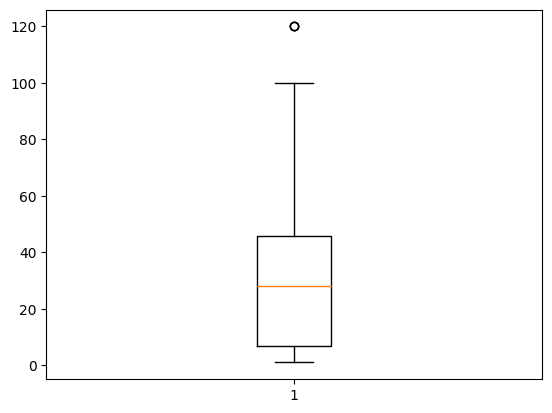

In [16]:
plt.boxplot(x = 'age', data=df)
plt.show()

# EDA

In [17]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

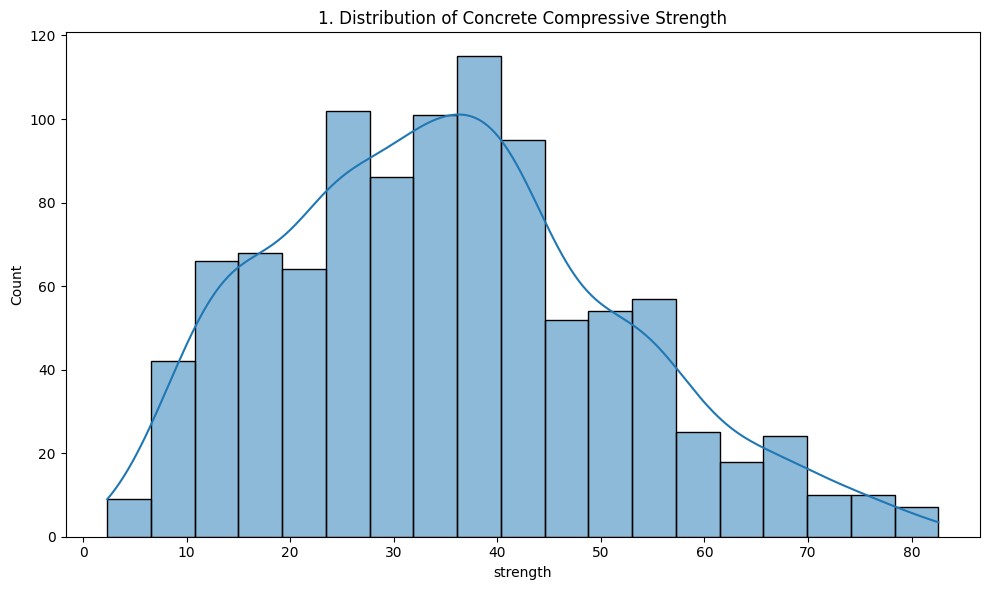

In [18]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['strength'], kde=True)
plt.title(f'{plot_no}. Distribution of Concrete Compressive Strength')
show_fig()
plot_no += 1


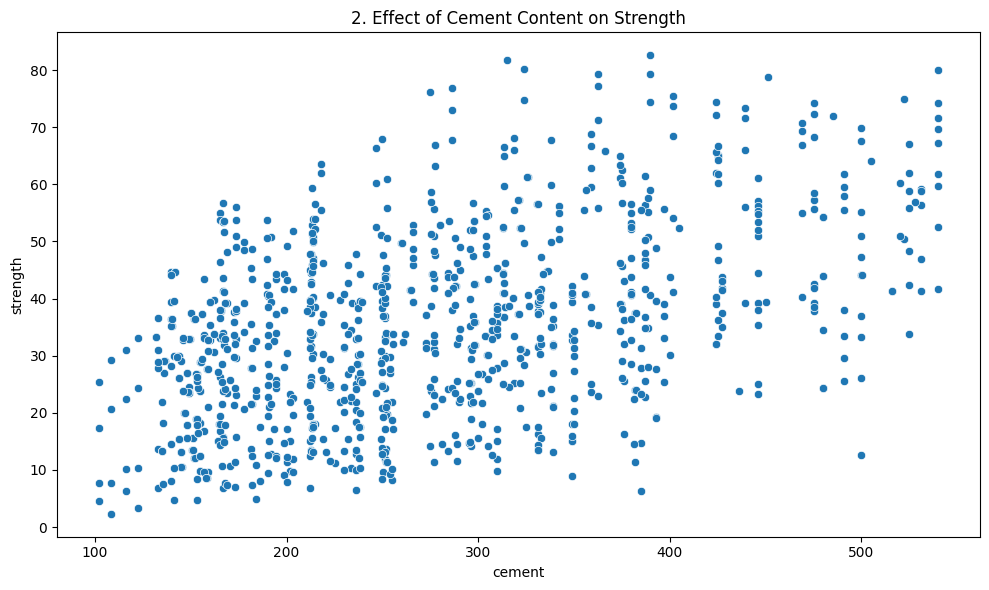

In [19]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='cement', y='strength')
plt.title(f'{plot_no}. Effect of Cement Content on Strength')
show_fig()
plot_no += 1


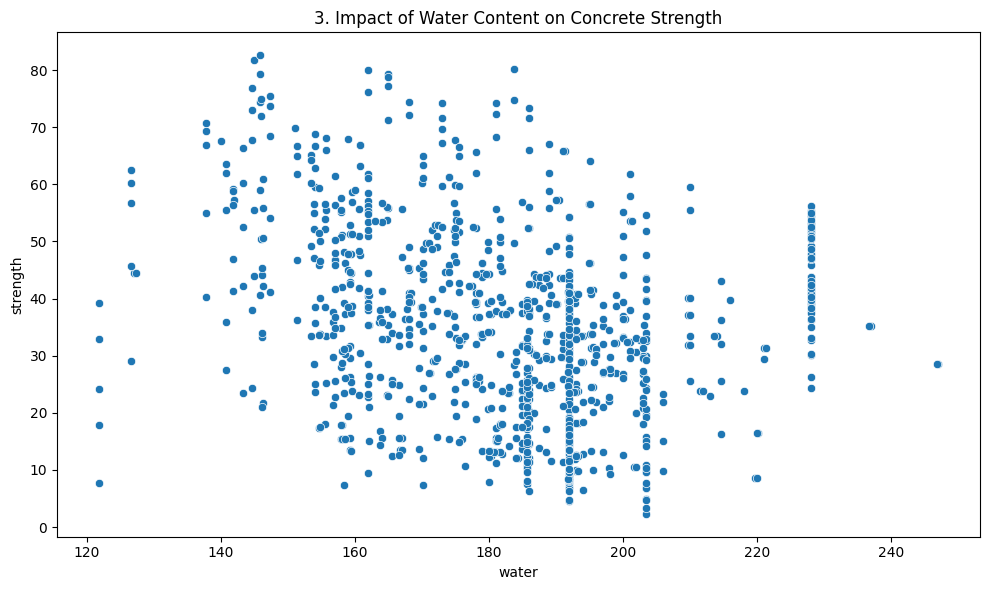

In [20]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='water', y='strength')
plt.title(f'{plot_no}. Impact of Water Content on Concrete Strength')
show_fig()
plot_no += 1


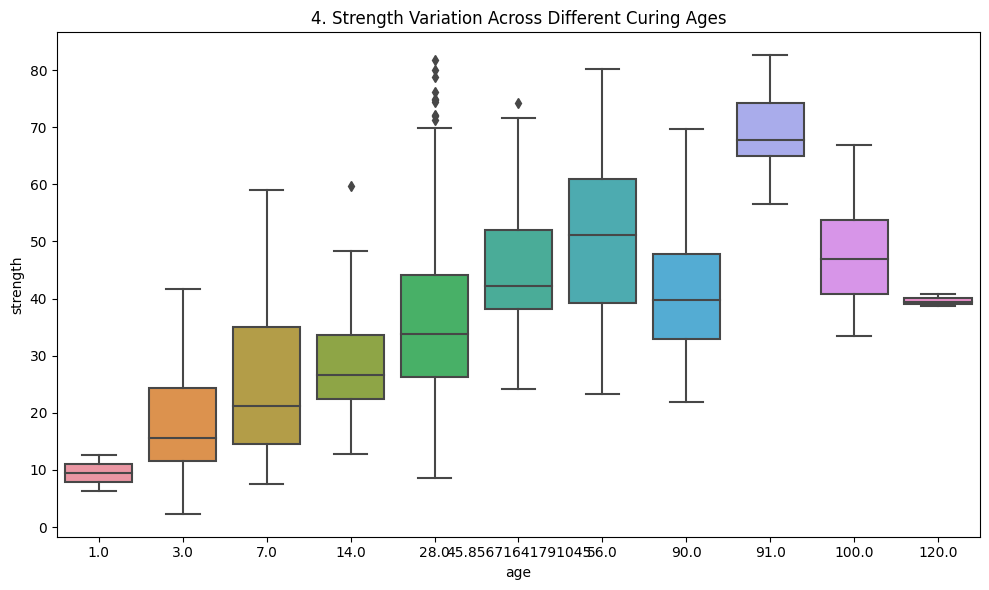

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='age', y='strength')
plt.title(f'{plot_no}. Strength Variation Across Different Curing Ages')
show_fig()
plot_no += 1


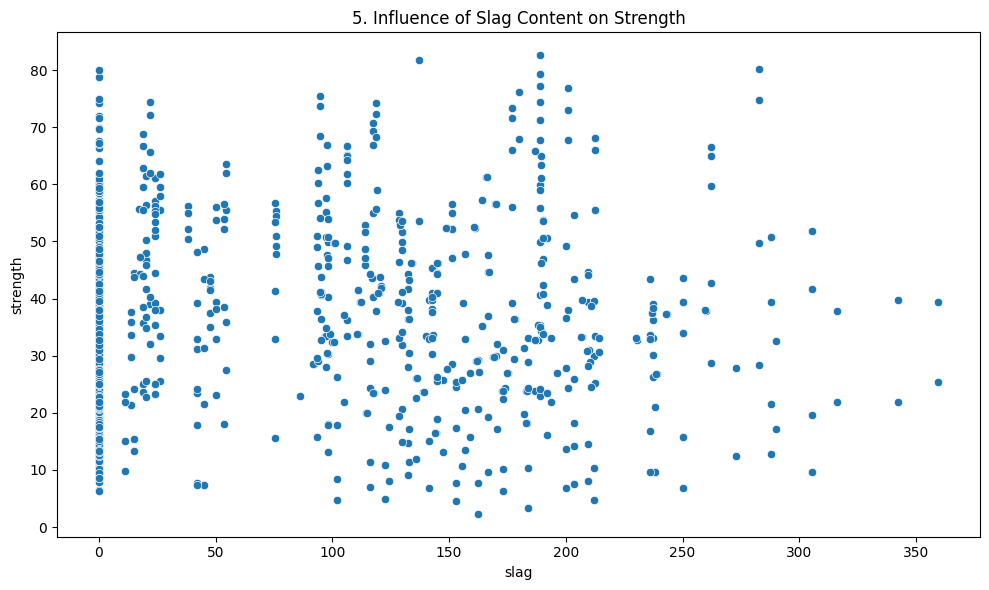

In [22]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='slag', y='strength')
plt.title(f'{plot_no}. Influence of Slag Content on Strength')
show_fig()
plot_no += 1


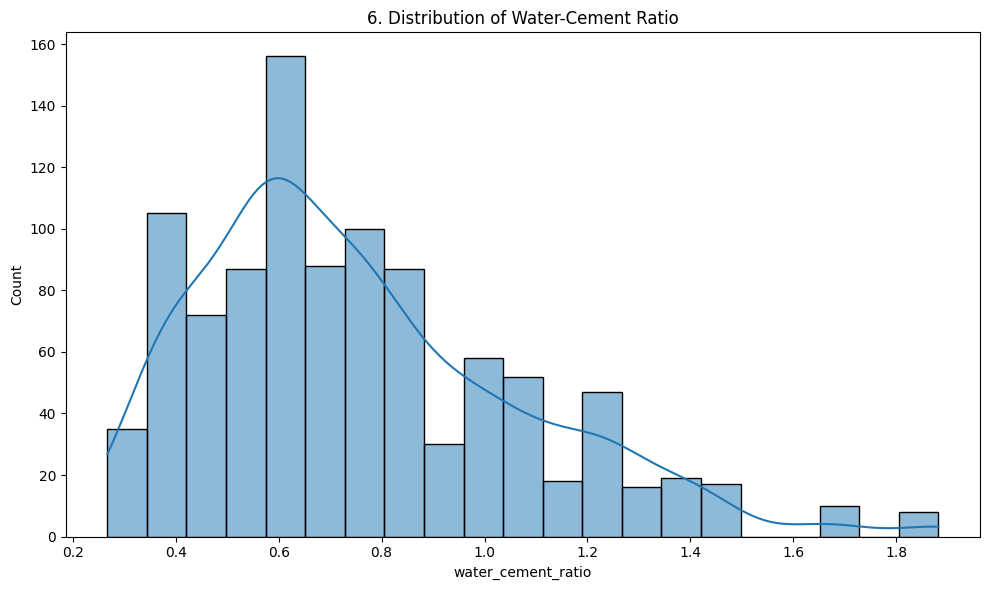

In [23]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['water_cement_ratio'], kde=True)
plt.title(f'{plot_no}. Distribution of Water-Cement Ratio')
show_fig()
plot_no += 1


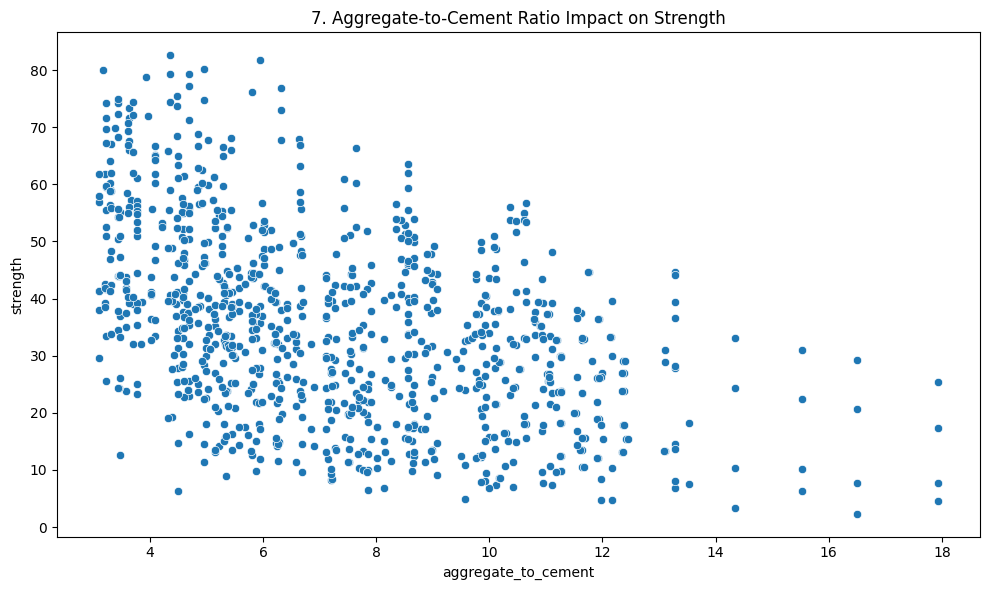

In [24]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='aggregate_to_cement', y='strength')
plt.title(f'{plot_no}. Aggregate-to-Cement Ratio Impact on Strength')
show_fig()
plot_no += 1


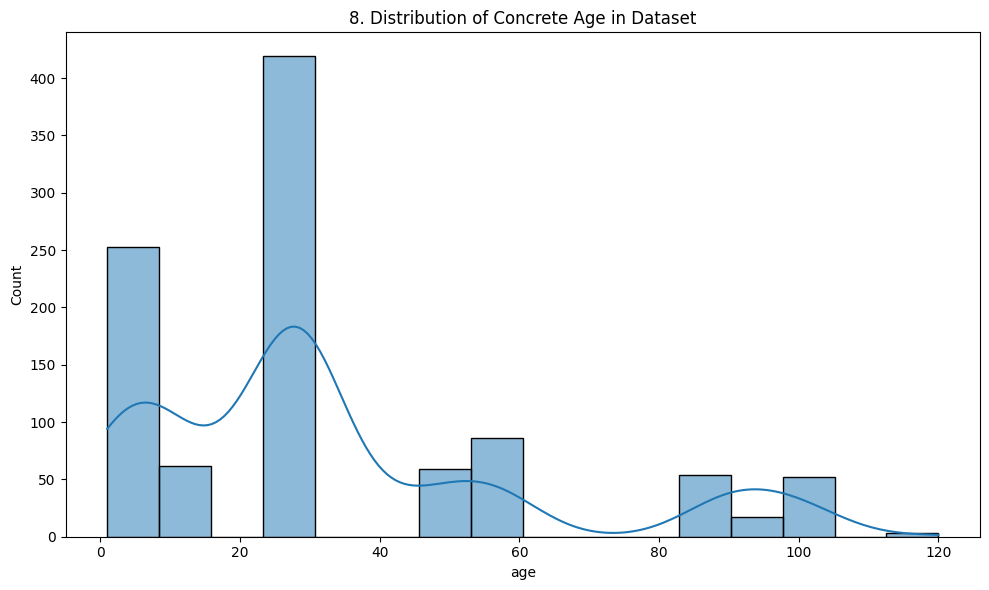

In [25]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True)
plt.title(f'{plot_no}. Distribution of Concrete Age in Dataset')
show_fig()
plot_no += 1


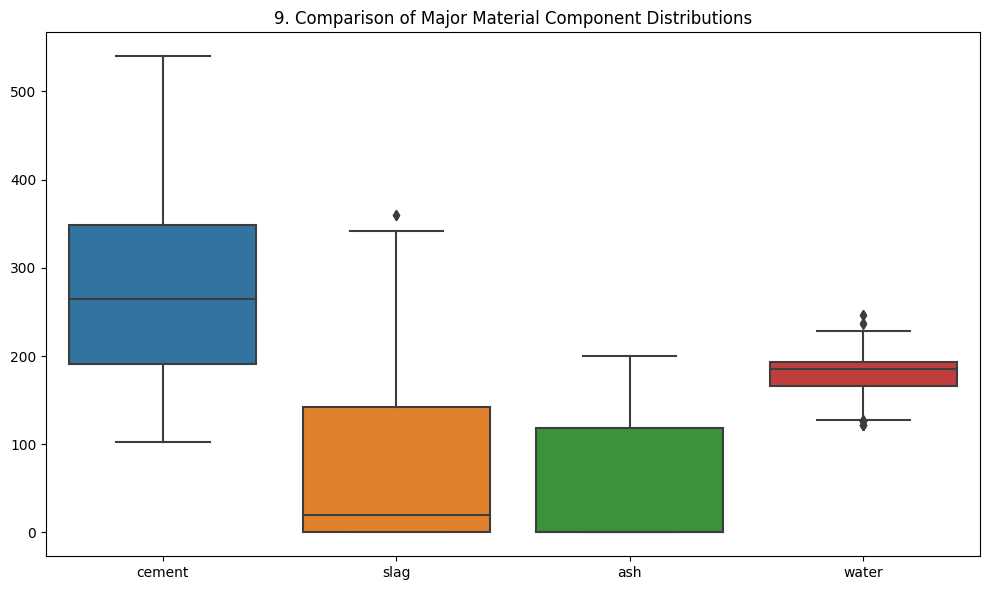

In [26]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df[['cement','slag','ash','water']])
plt.title(f'{plot_no}. Comparison of Major Material Component Distributions')
show_fig()
plot_no += 1


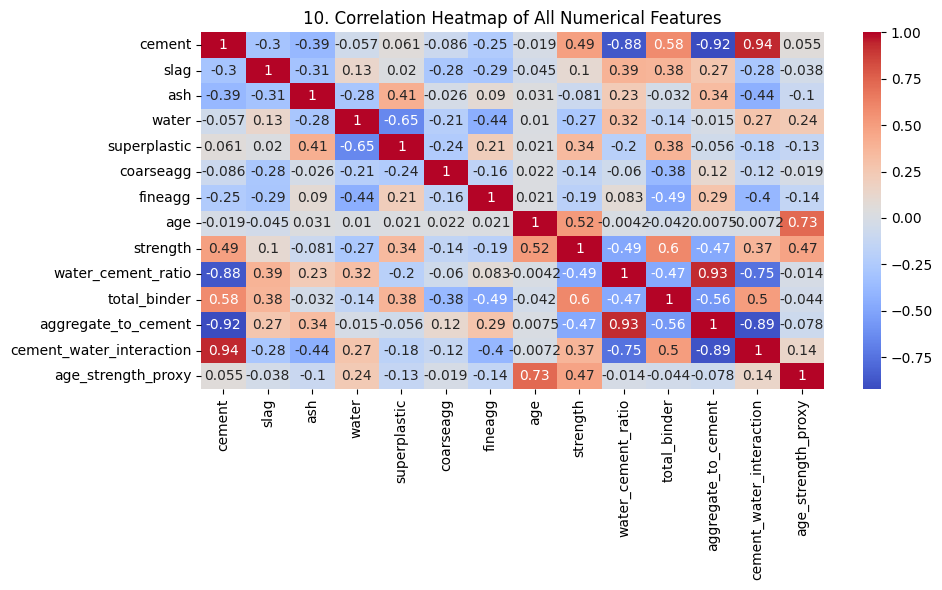

In [27]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title(f'{plot_no}. Correlation Heatmap of All Numerical Features')
show_fig()
plot_no += 1


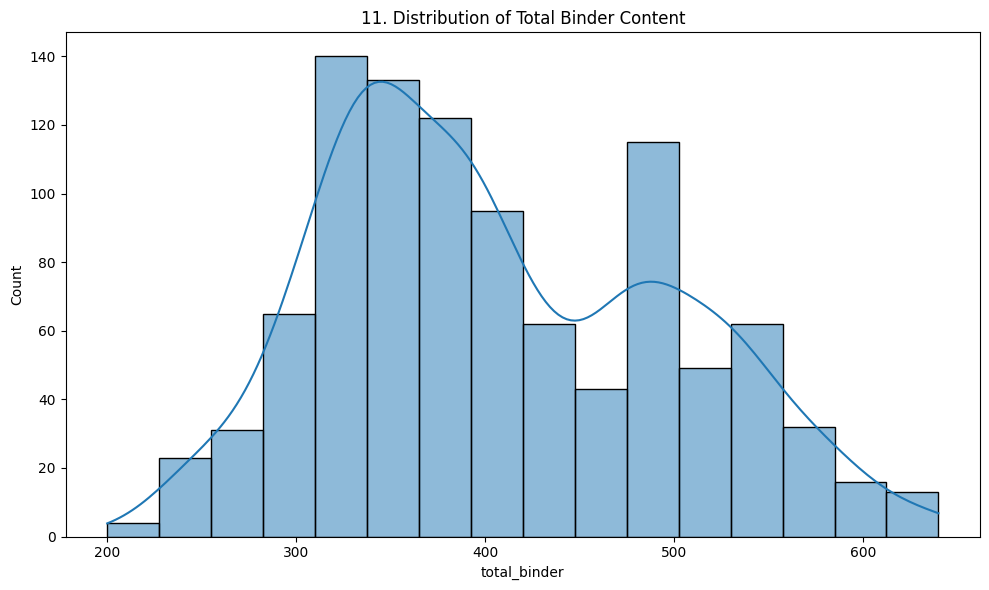

In [28]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['total_binder'], kde=True)
plt.title(f'{plot_no}. Distribution of Total Binder Content')
show_fig()
plot_no += 1


# Model Training

## Select Features

In [29]:
X = df.drop(columns=['strength'])
y = df['strength']

## Train-Test spilit 80:20 Ratio

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Scal data

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVR

In [32]:
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.9106610749683108
MAE: 3.3520182567153385
RMSE: 4.9254806087318865


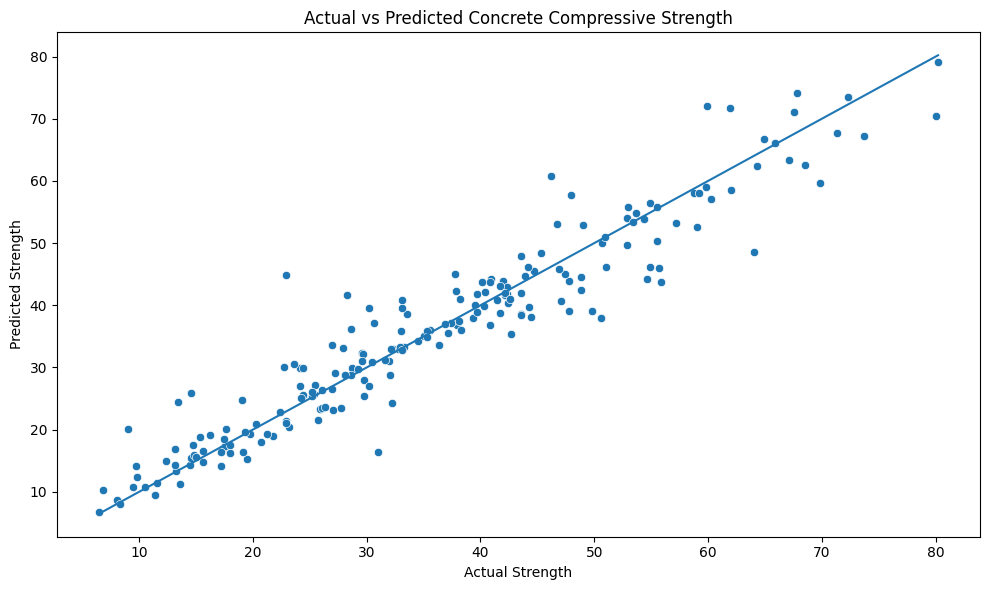

In [33]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.title('Actual vs Predicted Concrete Compressive Strength')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.tight_layout()
plt.savefig('actual_vs_predicted_strength_day1.png', dpi=300, bbox_inches='tight')
plt.show()